In [92]:
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.datasets import fetch_olivetti_faces 
from sklearn.decomposition import DictionaryLearning, MiniBatchDictionaryLearning
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

Classes: 40
Samples total: 400
Dimensionality: 4096
Features: 0.0 to 1.0


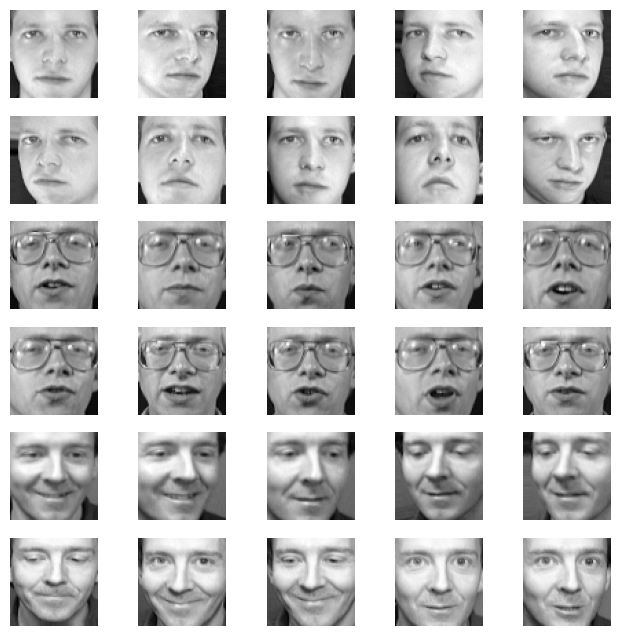

In [93]:
# 指定数据集的下载和缓存文件夹，默认为'~/scikit_learn_data'
data_home = None

# 是否打乱数据集顺序，避免同一个人的图像被分组在一起
shuffle = False

# 随机数生成器的种子，用于数据集的打乱
random_state = 0

# 如果本地没有数据，是否尝试从源站点下载
download_if_missing = True

# 是否返回 (data, target) 对而不是 Bunch 对象
return_X_y = False

# 从AT&T下载并加载 Olivetti faces 数据集
olivetti_faces = fetch_olivetti_faces(data_home=data_home,
                                      shuffle=shuffle,
                                      random_state=random_state,
                                      download_if_missing=download_if_missing,
                                      return_X_y=return_X_y)

# 获取数据，图像和标签
data = olivetti_faces.data
images = olivetti_faces.images
target = olivetti_faces.target

# 获取数据集的描述信息
description = olivetti_faces.DESCR

# 打印数据集的一些信息
print("Classes:", len(set(target)))
print("Samples total:", len(data))
print("Dimensionality:", data.shape[1])
print("Features:", data.min(), "to", data.max())

# 显示数据集中的一些图像
plt.figure(figsize=(8, 8))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [94]:
# 加载 Olivetti faces 数据集
faces_data = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces_images = faces_data.images
faces_data_flat = faces_data.data
faces_target = faces_data.target

In [95]:
# 使用 SVM 进行分类
svm_classifier = SVC(kernel='linear', C=1.0)
n_components = 64

In [56]:
# 使用基础字典学习进行特征提取
dict_learning = DictionaryLearning(n_components=n_components, random_state=rng)
start_time = time.time()
X_transformed1 = dict_learning.fit_transform(faces_data_flat)
elapsed_time = time.time() - start_time

# 使用交叉验证计算准确度
cv_accuracy = cross_val_score(svm_classifier, X_transformed1, faces_target, cv=5)
print("Cross-validated Accuracy:", cv_accuracy.mean())
print("Training time:", elapsed_time)

C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\linear_model\_least_angle.py:669: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 19 iterations, alpha=7.383e-04, previous alpha=7.383e-04, with an active set of 16 regressors.
  warnings.warn(


Cross-validated Accuracy: 0.9475000000000001
Training time: 163.85265278816223


In [100]:
def whole_upgrade(n_components,svm_classifier,faces_data_flat=faces_data_flat,faces_target=faces_target,random_state=rng):
  # 使用基础字典学习进行特征提取
  dict_learning = DictionaryLearning(n_components=n_components, random_state=rng)
  start_time = time.time()
  X_transformed1 = dict_learning.fit_transform(faces_data_flat)
  elapsed_time = time.time() - start_time

  # 使用交叉验证计算准确度
  cv_accuracy = cross_val_score(svm_classifier, X_transformed1, faces_target, cv=5)
  #print("Cross-validated Accuracy:", cv_accuracy.mean())
  #print("Training time:", elapsed_time)
  return cv_accuracy.mean(), elapsed_time

In [71]:
# 使用 MiniBatchDictionaryLearning 进行字典学习，选择 OMP 方法
omp_dict_learning = MiniBatchDictionaryLearning(n_components=n_components, alpha=1, transform_algorithm='omp',batch_size = 3)
start_time = time.time()
X_transformed2 = omp_dict_learning.fit_transform(faces_data_flat)
elapsed_time = time.time() - start_time

# 使用交叉验证计算准确度
cv_accuracy = cross_val_score(svm_classifier, X_transformed2, faces_target, cv=5)
print("Cross-validated Accuracy:", cv_accuracy.mean())
print("Training time:", elapsed_time)

C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


Cross-validated Accuracy: 0.9225
Training time: 34.07087826728821


In [99]:
def omp_upgrade_bs(n_components,alpha, svm_classifier,bs=3,faces_data_flat=faces_data_flat,faces_target=faces_target,random_state=rng):
  # 使用 MiniBatchDictionaryLearning 进行字典学习，选择 OMP 方法
  omp_dict_learning = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, transform_algorithm='omp', batch_size = bs)
  start_time = time.time()
  X_transformed2 = omp_dict_learning.fit_transform(faces_data_flat)
  elapsed_time = time.time() - start_time

  # 使用交叉验证计算准确度
  cv_accuracy = cross_val_score(svm_classifier, X_transformed2, faces_target, cv=5)
  #print("Cross-validated Accuracy:", cv_accuracy.mean())
  #print("Training time:", elapsed_time)
  return cv_accuracy.mean(), elapsed_time

In [97]:
bs_vals = np.arange(1, 10)
acry_vals = []
time_vals = []

for b in bs_vals:
    acry, time_bs = omp_upgrade_bs(n_components, 1, svm_classifier, bs = b)
    acry_vals.append(acry)
    time_vals.append(time_bs)
    print(f'down: bs={b}')

C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.717e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.802e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\linear_model\_least_angle.py:669: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well control

down: bs=1


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=2


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=3


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=4


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=5


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=6


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=7


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=8


C:\Users\Qu Dachen\miniconda3\envs\project596\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


down: bs=9


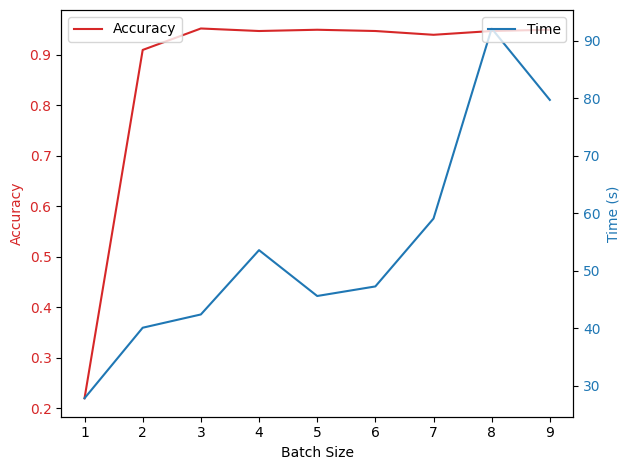

In [98]:
# 创建第一个 Y 轴（准确度）
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(bs_vals, acry_vals, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个 Y 轴（时间）
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(bs_vals, time_vals, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加图例
ax1.legend(['Accuracy'], loc='upper left')
ax2.legend(['Time'], loc='upper right')

fig.tight_layout()
plt.show()


In [105]:
n_components_vals = np.arange(1, 11)
acry_vals_wh = []
time_vals_wh = []

for n in n_components_vals:
    acry_wh, time_wh = whole_upgrade(n,svm_classifier)
    acry_vals_wh.append(acry_wh)
    time_vals_wh.append(time_wh)
    print(f'down: n={n}')

down: n=1
down: n=2
down: n=3
down: n=4
down: n=5
down: n=6
down: n=7
down: n=8
down: n=9
down: n=10


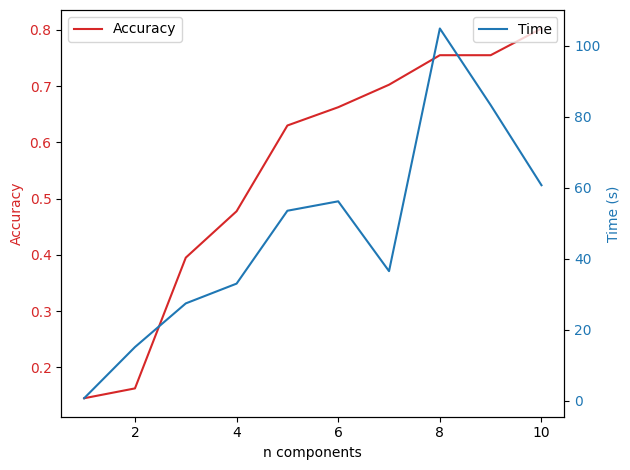

In [106]:
# 创建第一个 Y 轴（准确度）
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n components')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(n_components_vals, acry_vals_wh, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个 Y 轴（时间）
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(n_components_vals, time_vals_wh, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加图例
ax1.legend(['Accuracy'], loc='upper left')
ax2.legend(['Time'], loc='upper right')

fig.tight_layout()
plt.show()

In [107]:
n_components_vals = np.arange(11, 21)
acry_vals_wh = []
time_vals_wh = []

for n in n_components_vals:
    acry_wh, time_wh = whole_upgrade(n,svm_classifier)
    acry_vals_wh.append(acry_wh)
    time_vals_wh.append(time_wh)
    print(f'down: n={n}')

down: n=11
down: n=12
down: n=13
down: n=14
down: n=15
down: n=16
down: n=17
down: n=18
down: n=19
down: n=20


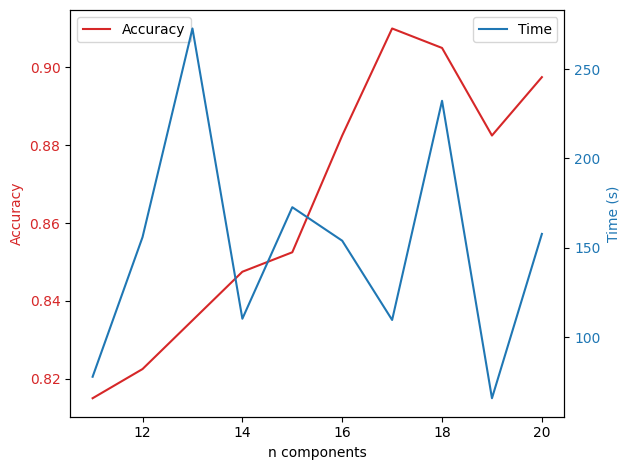

In [108]:
# 创建第一个 Y 轴（准确度）
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n components')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(n_components_vals, acry_vals_wh, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个 Y 轴（时间）
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(n_components_vals, time_vals_wh, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加图例
ax1.legend(['Accuracy'], loc='upper left')
ax2.legend(['Time'], loc='upper right')

fig.tight_layout()
plt.show()